In [ ]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

In [ ]:
import bs4
import re

In [ ]:
pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

  Cloning git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-2a01s90v
  Running command git clone -q git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-2a01s90v
     |████████████████████████████████| 5.6 MB 4.4 MB/s 
     |████████████████████████████████| 117 kB 30.8 MB/s 
     |████████████████████████████████| 180 kB 41.0 MB/s 
     |████████████████████████████████| 76 kB 2.4 MB/s 
     |████████████████████████████████| 131 kB 40.6 MB/s 
     |████████████████████████████████| 32.8 MB 67 kB/s 
     |████████████████████████████████| 79 kB 4.1 MB/s 
     |████████████████████████████████| 8.5 MB 37.9 MB/s 
     |████████████████████████████████| 138 kB 45.7 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 5.1 MB 42.3 MB/s 
     |████████████████████████████████| 127 kB 20.2 MB/s 
  Created wheel for lucem-illud: filename=lucem_illud-8.0.1-py3-no

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
nlb = pandas.read_csv('/content/drive/My Drive/Colab Notebooks/data/nlb_articles/NLB.csv')

In [ ]:
nlb

,uid,book_title,subject,summary,original_publisher,digital_publisher,format,language,copyright,author_name,published,resource_url,cover,thumbnail
0,d129a114-12d1-456f-ba77-3c1fad52d9ab,17th APEC meeting,Events | Economy |nlbshtx:Events|nlbshtx:Econo...,Singapore hosted the 17th Asia-Pacific Economi...,na,National Library Board Singapore,text/html :. .,eng,na,na,na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...
1,2dbdfae5-8e45-48da-87e0-5e8436a7ff44,17th century Singapore Straits,Politics and Government {18336134}|Geography a...,The Singapore Straits is among the most geogra...,na,National Library Board Singapore,text/html :. .,eng,na,na,na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...
2,92bb56f0-e821-40d1-bd8c-cf8fa7e7f172,1819 Singapore Treaty,Politics and Government {18336134}|Events {184...,"On 6 February 1819, Sir Stamford Raffles, Teme...",na,National Library Board Singapore,text/html :. .,eng,na,na,na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...
3,9590a69f-b3c8-4208-92bb-11ff74934af6,1824 Treaty of Friendship and Alliance,na,The Treaty of Friendship and Alliance was sign...,na,National Library Board Singapore,text/html :. .,eng,All Rights Reserved. National Library Board Si...,na,na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...
4,82db2bb0-b99c-4a9f-9beb-b25626cb3f87,1915 Singapore Mutiny,nlbshtx:Events>>Historical Periods>>Founding o...,"In the midst of World War I, on 15 February 19...",na,National Library Board Singapore,"text/html :. 11 KB, 2 p..",eng,na,"Tan, Bonny",na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,b7af4c0f-b141-4f87-a377-4b3ecc9deb90,Zena Tessensohn,Athletic clubs--Singapore|Women hockey players...,Zena Denise Tessensohn née Clarke (b. 16 Decem...,na,na,"text/html :. 16.65 KB, 3 p..",eng,na,"Sutherland, Duncan",na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...
1928,fe14c69f-7d05-4844-abae-de842064f5ce,Zhong Yuan Jie (Hungry Ghost Festival),nlbshtx:Ethnic Communities>>Festivals and Cele...,"Zhong Yuan Jie (中元节), also known as the Hungry...",na,National Library Board Singapore,"text/html :. 10 KB, 1 p..",eng,na,"Sim, Cheryl",na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...
1929,f5a5b0cb-3b2f-4780-867d-33713b0558aa,Zhu Xu,Arts {18336109}|nlbshtx:Arts|Personalities {18...,"Zhu Xu (朱绪) (b. 15 November 1909, Quanzhou, Fu...",na,National Library Board Singapore,text/html :. .,eng,na,"Sim, Cheryl",na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...
1930,f14e4ab4-e713-4036-a649-599ea5217cca,Zouk,Sports and Recreation {18486681}|nlbshtx:Recre...,Zouk is a globally renowned award-winning nigh...,na,National Library Board Singapore,text/html :. .,eng,All Rights Reserved. National Library Board Si...,"Ho, Aloysius|Lim, Fiona",na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...


In [ ]:
clean = '[\n\t.\][\u4e00-\u9fff]+'
punc = '[.*\\!)*?/]'

texts = {}

for link in nlb['resource_url']: 
  print(link)
  request = requests.get(link)
  soup = bs4.BeautifulSoup(request.text, 'html.parser')
  pTag = soup.find_all('p')
  for t in pTag: 
    split = t.text.split('\n\n')
    for string in split: 
        string = re.sub(r'\xa0', ' ', string)
        if link not in texts: 
            texts[link] = []
        texts[link].append(string)

http://eresources.nlb.gov.sg/infopedia/articles/SIP_2014-04-04_152349.html
http://eresources.nlb.gov.sg/infopedia/articles/SIP_2014-07-14_095636.html
http://eresources.nlb.gov.sg/infopedia/articles/SIP_2014-05-16_133354.html
http://eresources.nlb.gov.sg/infopedia/articles/SIP_2015-07-23_153326.html
http://eresources.nlb.gov.sg/infopedia/articles/SIP_570_2005-01-24.html
http://eresources.nlb.gov.sg/infopedia/articles/SIP_2018-09-25_113031.html
http://eresources.nlb.gov.sg/infopedia/articles/SIP_2014-07-07_134339.html
http://eresources.nlb.gov.sg/infopedia/articles/SIP_1242_2012-04-30.html
http://eresources.nlb.gov.sg/infopedia/articles/SIP_2019-04-08_145822.html
http://eresources.nlb.gov.sg/infopedia/articles/SIP_2019-05-08_100128.html
http://eresources.nlb.gov.sg/infopedia/articles/SIP_1115_2008-11-24.html
http://eresources.nlb.gov.sg/infopedia/articles/SIP_292_2004-12-23.html
http://eresources.nlb.gov.sg/infopedia/articles/SIP_427__2008-11-18.html
http://eresources.nlb.gov.sg/infopedi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
texts

{'http://eresources.nlb.gov.sg/infopedia/articles/SIP_2014-04-04_152349.html': ['',
  'Singapore hosted the 17th Asia-Pacific Economic Cooperation (APEC) Economic Leaders’ Meeting on 14 and 15 November 2009. The highlight was the presence at the meeting of United States President Barack Obama in his first official visit to Asia. The meeting saw the United States promise to increase its engagement with the Association of Southeast Asian Nations (ASEAN), the regional grouping in which Singapore is a founding member.1 The two-day APEC Economic Leaders’ Meeting was the finale of a series of events held from February to November 2009 during which more than 15,000 delegates from the 21 APEC member-economies attended about 123 meetings and events in Singapore.2 The backgroundAPEC is an informal forum for the promotion of trade and growth between the member economies. The term “member economy” is used to describe “an official member of APEC” where participation is not by “sovereign countries b

In [ ]:
nlb = pandas.DataFrame(texts.items(), columns = ['link', 'content'])

In [ ]:
nlb

,link,content
0,http://eresources.nlb.gov.sg/infopedia/article...,"[, Singapore hosted the 17th Asia-Pacific Econ..."
1,http://eresources.nlb.gov.sg/infopedia/article...,"[, The Singapore Straits is among the most geo..."
2,http://eresources.nlb.gov.sg/infopedia/article...,"[, On 6 February 1819, Stamford Raffles, Temen..."
3,http://eresources.nlb.gov.sg/infopedia/article...,"[, The Treaty of Friendship and Alliance was s..."
4,http://eresources.nlb.gov.sg/infopedia/article...,"[, In the midst of World War I, on 15 February..."
...,...,...
1926,http://eresources.nlb.gov.sg/infopedia/article...,"[ by Sutherland, Duncan, Zena Denise Tessensoh..."
1927,http://eresources.nlb.gov.sg/infopedia/article...,"[, Zhong Yuan Jie (中元节), also known as the Hun..."
1928,http://eresources.nlb.gov.sg/infopedia/article...,"[ by Sim, Cheryl, Zhu Xu (朱绪) (b. 15 November ..."
1929,http://eresources.nlb.gov.sg/infopedia/article...,"[ by Ho, Aloysius, Zouk is a globally renowned..."


## <font color="red">*Exercise 1*</font>

<font color="red">Construct cells immediately below this that construct features and cluster your documents using K-means and a variety of cluster numbers. Interrogate the cluster contents in terms of both documents and features. Identify the "optimal" cluster number with Silhouette analysis. Plot clusters and features after reducing with PCA. What does this cluster structure reveal about the organization of documents in your corpora? 

According to the sillhouete analysis, the optimal cluster number is 6, though this is only marginally better than the other clusters. The k-means plot after PCA reduction, suggest that while each type of document has a distinct topic that could be identified, a majority of them centre these topics around another more central topic. This is unsurprising because the corpus is composed of articles that "define" Singapore. 

In [ ]:
nlbCountVectorizer = sklearn.feature_extraction.text.CountVectorizer()

In [ ]:
nlbCountVects = nlbCountVectorizer.fit_transform(nlb_texts['no_list'])

NameError: ignored

In [ ]:
nlbVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')

In [ ]:
nlbTFVects = nlbVectorizer.fit_transform(nlb['no_list'])

In [ ]:
km = sklearn.cluster.KMeans(n_clusters=5, init='k-means++')

In [ ]:
km.fit(nlbTFVects)

KMeans(n_clusters=5)

In [ ]:
print("The available metrics are: {}".format([s for s in dir(sklearn.metrics) if s[0] != '_']))
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(nlb['summary'], km.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(nlb['summary'], km.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(nlb['summary'], km.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(nlb['summary'], km.labels_)))

The available metrics are: ['ConfusionMatrixDisplay', 'DetCurveDisplay', 'DistanceMetric', 'PrecisionRecallDisplay', 'RocCurveDisplay', 'SCORERS', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'd2_tweedie_score', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'max_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'mean_gamma_deviance', 'mean_pinball_loss', 'me

In [ ]:
nlb['kmeans_predictions'] = km.labels_
nlb

,uid,book_title,subject,summary,original_publisher,digital_publisher,format,language,copyright,author_name,published,resource_url,cover,thumbnail,kmeans_predictions
0,d129a114-12d1-456f-ba77-3c1fad52d9ab,17th APEC meeting,Events | Economy |nlbshtx:Events|nlbshtx:Econo...,Singapore hosted the 17th Asia-Pacific Economi...,na,National Library Board Singapore,text/html :. .,eng,na,na,na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,0
1,2dbdfae5-8e45-48da-87e0-5e8436a7ff44,17th century Singapore Straits,Politics and Government {18336134}|Geography a...,The Singapore Straits is among the most geogra...,na,National Library Board Singapore,text/html :. .,eng,na,na,na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,3
2,92bb56f0-e821-40d1-bd8c-cf8fa7e7f172,1819 Singapore Treaty,Politics and Government {18336134}|Events {184...,"On 6 February 1819, Sir Stamford Raffles, Teme...",na,National Library Board Singapore,text/html :. .,eng,na,na,na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,3
3,9590a69f-b3c8-4208-92bb-11ff74934af6,1824 Treaty of Friendship and Alliance,na,The Treaty of Friendship and Alliance was sign...,na,National Library Board Singapore,text/html :. .,eng,All Rights Reserved. National Library Board Si...,na,na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,0
4,82db2bb0-b99c-4a9f-9beb-b25626cb3f87,1915 Singapore Mutiny,nlbshtx:Events>>Historical Periods>>Founding o...,"In the midst of World War I, on 15 February 19...",na,National Library Board Singapore,"text/html :. 11 KB, 2 p..",eng,na,"Tan, Bonny",na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,b7af4c0f-b141-4f87-a377-4b3ecc9deb90,Zena Tessensohn,Athletic clubs--Singapore|Women hockey players...,Zena Denise Tessensohn née Clarke (b. 16 Decem...,na,na,"text/html :. 16.65 KB, 3 p..",eng,na,"Sutherland, Duncan",na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,0
1928,fe14c69f-7d05-4844-abae-de842064f5ce,Zhong Yuan Jie (Hungry Ghost Festival),nlbshtx:Ethnic Communities>>Festivals and Cele...,"Zhong Yuan Jie (中元节), also known as the Hungry...",na,National Library Board Singapore,"text/html :. 10 KB, 1 p..",eng,na,"Sim, Cheryl",na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,0
1929,f5a5b0cb-3b2f-4780-867d-33713b0558aa,Zhu Xu,Arts {18336109}|nlbshtx:Arts|Personalities {18...,"Zhu Xu (朱绪) (b. 15 November 1909, Quanzhou, Fu...",na,National Library Board Singapore,text/html :. .,eng,na,"Sim, Cheryl",na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,1
1930,f14e4ab4-e713-4036-a649-599ea5217cca,Zouk,Sports and Recreation {18486681}|nlbshtx:Recre...,Zouk is a globally renowned award-winning nigh...,na,National Library Board Singapore,text/html :. .,eng,All Rights Reserved. National Library Board Si...,"Ho, Aloysius|Lim, Fiona",na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,1


In [ ]:
numClusters = len(set(nlb['summary']))
numClusters

1932

In [ ]:
terms = nlbVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(0, numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 chinese
 art
 arts
 malay
 known
 music
 theatre
 dish
 local
 cultural


Cluster 1:
 national
 known
 library
 located
 public
 government
 building
 british
 world
 road


Cluster 2:
 road
 street
 named
 bridge
 junction
 area
 connects
 located
 way
 chinatown


Cluster 3:


IndexError: ignored

In [ ]:
terms = nlbVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(0, numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 library
 national
 libraries
 services
 nlb
 board
 opened
 museum
 public
 located


Cluster 1:
 known
 located
 chinese
 building
 island
 malay
 japanese
 dish
 road
 built


Cluster 2:
 chinese
 known
 education
 national
 arts
 tan
 local
 company
 art
 school


Cluster 3:
 road
 street
 named
 bridge
 junction
 area
 connects
 located
 way
 chinatown


Cluster 4:


IndexError: ignored

In [ ]:
terms = nlbVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(0, numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 road
 street
 named
 bridge
 junction
 area
 connects
 located
 way
 chinatown


Cluster 1:
 chinese
 malay
 dish
 school
 community
 known
 club
 education
 indian
 china


Cluster 2:
 known
 national
 government
 public
 located
 company
 building
 world
 years
 british


Cluster 3:
 arts
 art
 music
 theatre
 cultural
 award
 medallion
 artist
 works
 local


Cluster 4:
 library
 national
 libraries
 services
 nlb
 board
 opened
 museum
 public
 located


Cluster 5:


IndexError: ignored

In [ ]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(nlbTFVects.toarray())
reduced_data = pca.transform(nlbTFVects.toarray())

In [ ]:
colordict = {
1: 'red',
0: 'orange',
2: 'green',
3: 'blue',
4: 'purple'
    }
colors = [colordict[c] for c in nlb['kmeans_predictions']]
print("The categories' colors are:\n{}".format(colordict.items()))

The categories' colors are:
dict_items([(1, 'red'), (0, 'orange'), (2, 'green'), (3, 'blue'), (4, 'purple')])


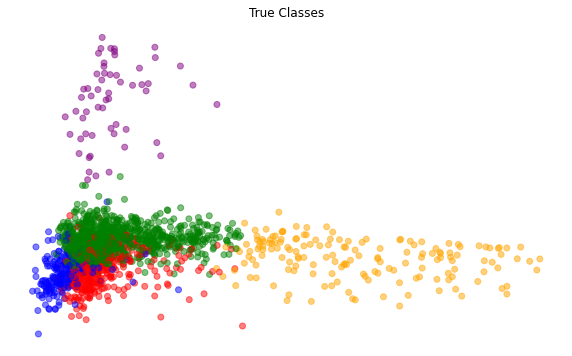

In [ ]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1],color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

In [ ]:
components = pca.components_
keyword_ids = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words(features) from your kmeans model.
words = [terms[i] for i in keyword_ids]#Turn the ids into words.
x = components[:,keyword_ids][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids][1,:]

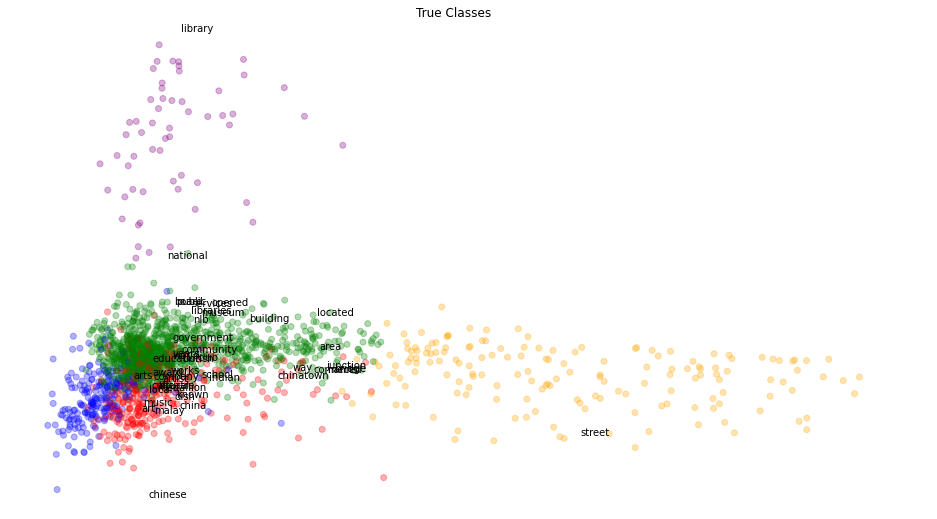

In [ ]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.3, label = colors)
for i, word in enumerate(words):
    ax.annotate(word, (x[i],y[i]))
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

In [ ]:
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


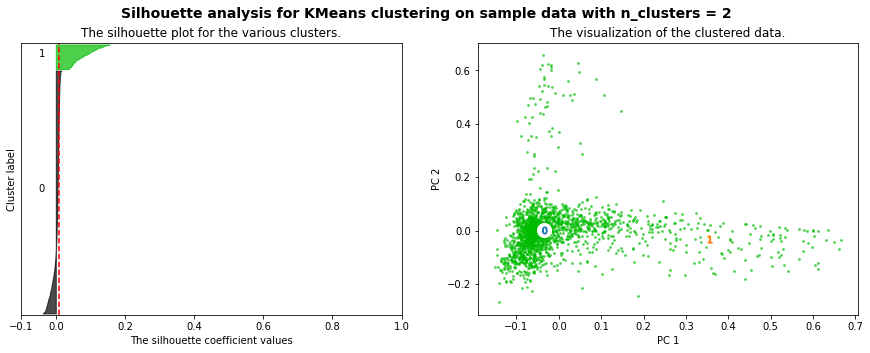

For n_clusters = 2, The average silhouette_score is : 0.009


In [ ]:
X = nlbTFVects.toarray()
plotSilhouette(2, X)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


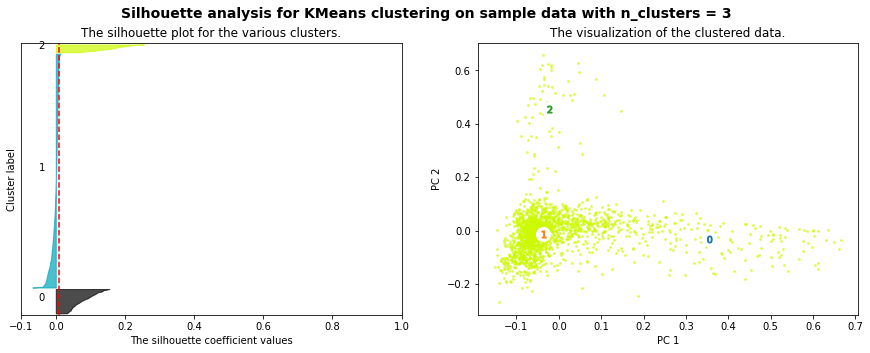

For n_clusters = 3, The average silhouette_score is : 0.010


In [ ]:
X = nlbTFVects.toarray()
plotSilhouette(3, X)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


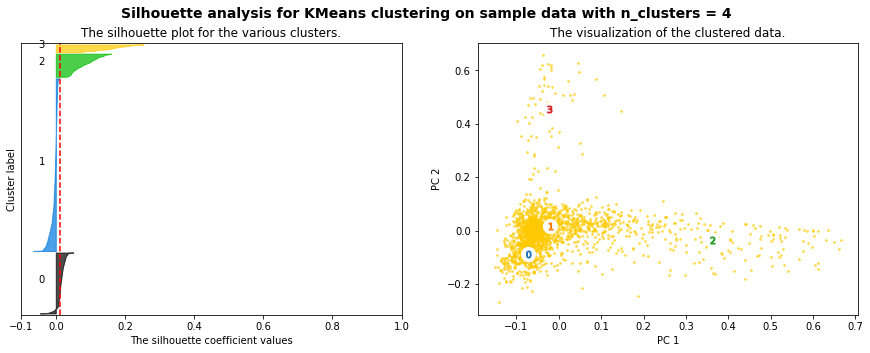

For n_clusters = 4, The average silhouette_score is : 0.012


In [ ]:
X = nlbTFVects.toarray()
plotSilhouette(4, X)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


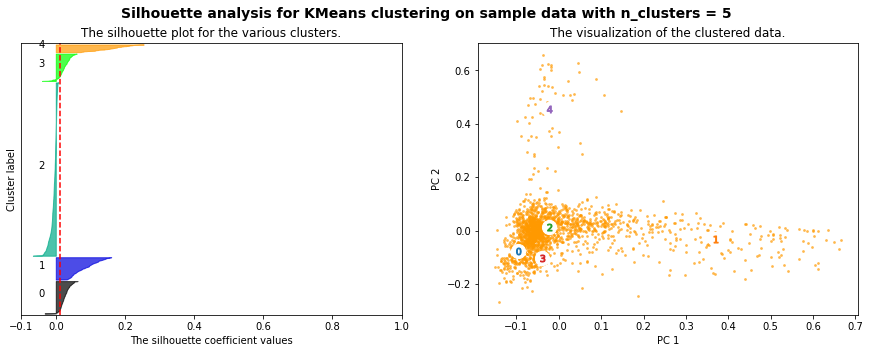

For n_clusters = 5, The average silhouette_score is : 0.013


In [ ]:
X = nlbTFVects.toarray()
plotSilhouette(5, X)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


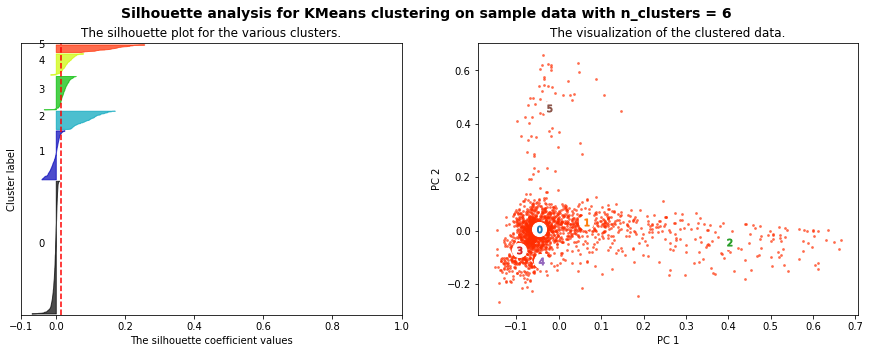

For n_clusters = 6, The average silhouette_score is : 0.014


In [ ]:
X = nlbTFVects.toarray()
plotSilhouette(6, X)

## <font color="red">*Exercise 2*</font>

<font color="red">Construct cells immediately below this that hierarchically cluster your documents using two approaches, and visualize them with a tree. Interrogate the recursive cluster contents in terms of both documents and closenesses. What does this nested cluster structure reveal about the organization of documents in your sampled corpora? Moreover, if they do worse than kmeans (as above), why do you think this is the case (hint: using metrics if you have ground truth or silhouette if you do not)? 

<font color="red">***Stretch***: Attempt using different distances into your clustering algorithms. (How) do they change the arrangement of clusters?

As could be inferred from the k-means clusters, despite having their own distinct domains, for example, architecture, art, or law, the topics are mostly under a larger central theme, with few additional branches seperating them. 

In [ ]:
nlbTFVects.todense()

matrix([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.2636185, 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]])

In [ ]:
nlbCoocMat = nlbTFVects * nlbTFVects.T

In [ ]:
nlbCoocMat.setdiag(0)

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [ ]:
selectIndices = []
indexToCat = []
for c in set(nlb['summary']):
    selectIndices += list(nlb[nlb['summary'] == c].index)[:50]
    indexToCat += [c] * 50

In [ ]:
subCoocMat = nlbCoocMat[selectIndices,:][:,selectIndices]

In [ ]:
linkage_matrix = scipy.cluster.hierarchy.ward(subCoocMat.toarray())
linkage_matrix[:10]

/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([[7.56000000e+02, 1.58700000e+03, 1.08091927e+00, 2.00000000e+00],
       [5.12000000e+02, 9.11000000e+02, 1.33683544e+00, 2.00000000e+00],
       [4.30000000e+02, 1.41400000e+03, 1.35269257e+00, 2.00000000e+00],
       [4.10000000e+01, 1.92000000e+02, 1.35883436e+00, 2.00000000e+00],
       [3.63000000e+02, 1.45900000e+03, 1.36052255e+00, 2.00000000e+00],
       [7.81000000e+02, 1.89800000e+03, 1.38557428e+00, 2.00000000e+00],
       [6.22000000e+02, 9.62000000e+02, 1.39042469e+00, 2.00000000e+00],
       [7.44000000e+02, 1.91900000e+03, 1.39889315e+00, 2.00000000e+00],
       [1.73000000e+02, 1.48900000e+03, 1.40110070e+00, 2.00000000e+00],
       [5.31000000e+02, 1.17500000e+03, 1.40560487e+00, 2.00000000e+00]])

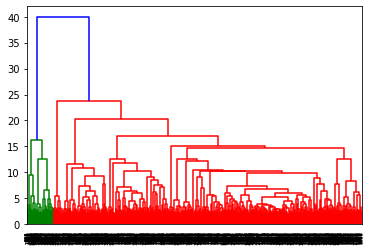

In [ ]:
dendDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, get_leaves=True)

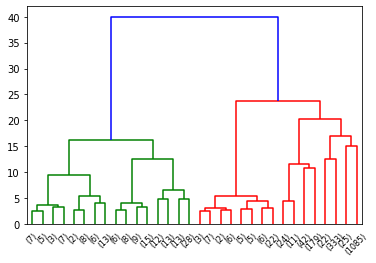

In [ ]:
dendrogramDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, p=4, truncate_mode='level', get_leaves=True)

In [ ]:
nlb['tokenized_text'] = nlb['no_list'].apply(lambda x: lucem_illud.word_tokenize(x))
nlb['normalized_tokens'] = nlb['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))

In [ ]:
nlb[:5]

,link,content,no_list,tokenized_text,normalized_tokens
0,http://eresources.nlb.gov.sg/infopedia/article...,"[, Singapore hosted the 17th Asia-Pacific Econ...",Singapore hosted the 17th Asia-Pacific Econom...,"[Singapore, hosted, the, 17th, Asia, Pacific, ...","[singapore, host, 17th, asia, pacific, economi..."
1,http://eresources.nlb.gov.sg/infopedia/article...,"[, The Singapore Straits is among the most geo...",The Singapore Straits is among the most geogr...,"[The, Singapore, Straits, is, among, the, most...","[singapore, strait, geographically, strategic,..."
2,http://eresources.nlb.gov.sg/infopedia/article...,"[, On 6 February 1819, Stamford Raffles, Temen...","On 6 February 1819, Stamford Raffles, Temengg...","[On, 6, February, 1819, Stamford, Raffles, Tem...","[february, stamford, raffle, temenggong, abdu’..."
3,http://eresources.nlb.gov.sg/infopedia/article...,"[, The Treaty of Friendship and Alliance was s...",The Treaty of Friendship and Alliance was sig...,"[The, Treaty, of, Friendship, and, Alliance, w...","[treaty, friendship, alliance, sign, august, e..."
4,http://eresources.nlb.gov.sg/infopedia/article...,"[, In the midst of World War I, on 15 February...","In the midst of World War I, on 15 February 1...","[In, the, midst, of, World, War, I, on, 15, Fe...","[midst, world, war, february, right, wing, raj..."


In [ ]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

nlb['reduced_tokens'] = nlb['normalized_tokens'].apply(lambda x: dropMissing(x, nlbVectorizer.vocabulary_.keys()))

In [ ]:
dictionary = gensim.corpora.Dictionary(nlb['reduced_tokens'])

In [ ]:
corpus = [dictionary.doc2bow(text) for text in nlb['reduced_tokens']]

In [ ]:
gensim.corpora.MmCorpus.serialize('nlb.mm', corpus)
nlbmm = gensim.corpora.MmCorpus('nlb.mm')

In [ ]:
nlblda = gensim.models.ldamodel.LdaModel(corpus=nlbmm, id2word=dictionary, num_topics=10, alpha='auto', eta='auto')

In [ ]:
ldaDF = pandas.DataFrame({
        'name' : nlb['book_title'],
        'topics' : [nlblda[dictionary.doc2bow(l)] for l in nlb['reduced_tokens']]
    })

ldaDF

,name,topics
0,17th APEC meeting,"[(2, 0.9568371)]"
1,17th century Singapore Straits,"[(8, 0.9780338)]"
2,1819 Singapore Treaty,"[(3, 0.25084198), (9, 0.72616327)]"
3,1824 Treaty of Friendship and Alliance,"[(3, 0.2891621), (9, 0.6645188)]"
4,1915 Singapore Mutiny,"[(8, 0.50806564), (9, 0.4453965)]"
...,...,...
1927,Zena Tessensohn,"[(7, 0.6077892), (8, 0.3516669)]"
1928,Zhong Yuan Jie (Hungry Ghost Festival),"[(3, 0.6223566), (9, 0.3234741)]"
1929,Zhu Xu,"[(3, 0.9767053)]"
1930,Zouk,"[(3, 0.7386714), (5, 0.22149122)]"


In [ ]:
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(nlblda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(nlblda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

ldaDF[1::100]

,name,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
1,17th century Singapore Straits,"[(8, 0.9780338)]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.978034,0.000000
101,Bashir Ahmad Mallal,"[(9, 0.94756955)]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.947570
201,Cat Welfare Society,"[(2, 0.31047642), (9, 0.65101635)]",0.000000,0.000000,0.310476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.651016
301,Chua Mia Tee,"[(5, 0.9672573)]",0.000000,0.000000,0.000000,0.000000,0.000000,0.967257,0.000000,0.000000,0.000000,0.000000
401,Durian,"[(0, 0.010043811), (5, 0.91889894)]",0.010044,0.000000,0.000000,0.000000,0.000000,0.918899,0.000000,0.000000,0.000000,0.000000
501,Force 136 (Operation Gustavus in Malaya),"[(6, 0.30673555), (8, 0.6620911)]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.306736,0.000000,0.662091,0.000000
601,Haig Road,"[(9, 0.9434742)]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.943474
701,J. W. D. Ambrose,"[(0, 0.6661975), (2, 0.2999329)]",0.666197,0.000000,0.299933,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
801,King Edward VII College of Medicine,"[(0, 0.9733806)]",0.973381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
901,Lim Tiong Ghee,"[(0, 0.010044147), (5, 0.9188975)]",0.010044,0.000000,0.000000,0.000000,0.000000,0.918898,0.000000,0.000000,0.000000,0.000000


In [ ]:
ldaDFV = ldaDF[:10][['topic_%d' %x for x in range(10)]]
ldaDFVisN = ldaDF[:10][['name']]
ldaDFVis = ldaDFV.as_matrix(columns=None)
ldaDFVisNames = ldaDFVisN.as_matrix(columns=None)
ldaDFV

AttributeError: ignored

In [ ]:
nlblda.show_topic(1)

[('road', 0.024568351),
 ('school', 0.016984507),
 ('hospital', 0.012443658),
 ('work', 0.012317077),
 ('expressway', 0.009783683),
 ('chinese', 0.009083213),
 ('new', 0.008650538),
 ('art', 0.008011874),
 ('house', 0.007850961),
 ('music', 0.007378661)]

In [ ]:
topicsDict = {}
for topicNum in range(nlblda.num_topics):
    topicWords = [w for w, p in nlblda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,road,road,school,art,street,chinese,local,library,street,road
1,street,school,year,company,chinese,library,national,national,club,national
2,area,hospital,bank,theatre,lee,art,year,road,world,government
3,national,work,england,national,minister,island,university,chinese,community,art
4,school,expressway,street,award,serve,open,company,water,art,east
5,temple,chinese,community,chinese,member,china,world,malaysia,early,area
6,old,new,government,work,road,house,game,time,year,british
7,education,art,serve,music,bridge,development,event,plan,japanese,coast
8,early,house,chinese,road,public,road,public,malay,award,education
9,malay,music,china,local,year,pulau,campaign,member,malay,year


## <font color="red">*Exercise 3*</font>

<font color="red">Construct cells immediately below this that topic model documents related to your anticipated final project. Interrogate and visually plot (e.g., as a bar graph?) the topic-word loadings and the document-topic loadings. What does this topic structure reveal about the distribution of contents across your documents? Systematically vary the $\alpha$, $\eta$, and topic number of the model for your text and describe in detail whether and how these changes led to distinctive outcomes, visible to you as analyst.  

<font color="red">**Stretch**: Cluster your documents, but instead of using words alone, use their topic loadings as an additional set of features. Do these topic loadings increase the apparent semantic coherence of your clusters?</font> 

According to the topic word loadings, many of the topics share similar words despite being focused on different themes. The small document-topic loading similarly show this overlap but between documents. As mentioned, this is unsurprising as these documents were meant to tell define Singapore's history thus it is expected that they coalesced around several core topics. Changing the eta values of the corpus do not change the probability distribution as obviously as when I changed the alpha values. The latter changes become even more obvious when I cut the number of topics in half. 

In [ ]:
import zipfile
import pandas as pd

In [ ]:
nlb_sub

,book_title,content
0,17th APEC meeting,"[, Singapore hosted the 17th Asia-Pacific Econ..."
1,17th century Singapore Straits,"[, The Singapore Straits is among the most geo..."
2,1819 Singapore Treaty,"[, On 6 February 1819, Stamford Raffles, Temen..."
3,1824 Treaty of Friendship and Alliance,"[, The Treaty of Friendship and Alliance was s..."
4,1915 Singapore Mutiny,"[, In the midst of World War I, on 15 February..."
...,...,...
1927,Zena Tessensohn,"[, Zhong Yuan Jie (中元节), also known as the Hun..."
1928,Zhong Yuan Jie (Hungry Ghost Festival),"[ by Sim, Cheryl, Zhu Xu (朱绪) (b. 15 November ..."
1929,Zhu Xu,"[ by Ho, Aloysius, Zouk is a globally renowned..."
1930,Zouk,"[ by Sim, Cheryl, Zubir Said (b. 22 July 1907,..."


In [ ]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    if type(word_list) == str:
      doc = nlp(word_list)
      for token in doc:
          if not token.is_punct and len(token.text.strip()) > 0:
              tokenized.append(token.text)
      return tokenized

In [ ]:
import spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
months = r'(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Sept|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)'

In [ ]:
def no_list(i): 
  string = ' '.join(i)

  return string

In [ ]:
nlb['no_list'] = nlb['content'].apply(lambda x: no_list(x))

In [ ]:
nlb

,link,content,no_list
0,http://eresources.nlb.gov.sg/infopedia/article...,"[, Singapore hosted the 17th Asia-Pacific Econ...",Singapore hosted the 17th Asia-Pacific Econom...
1,http://eresources.nlb.gov.sg/infopedia/article...,"[, The Singapore Straits is among the most geo...",The Singapore Straits is among the most geogr...
2,http://eresources.nlb.gov.sg/infopedia/article...,"[, On 6 February 1819, Stamford Raffles, Temen...","On 6 February 1819, Stamford Raffles, Temengg..."
3,http://eresources.nlb.gov.sg/infopedia/article...,"[, The Treaty of Friendship and Alliance was s...",The Treaty of Friendship and Alliance was sig...
4,http://eresources.nlb.gov.sg/infopedia/article...,"[, In the midst of World War I, on 15 February...","In the midst of World War I, on 15 February 1..."
...,...,...,...
1926,http://eresources.nlb.gov.sg/infopedia/article...,"[ by Sutherland, Duncan, Zena Denise Tessensoh...","by Sutherland, Duncan Zena Denise Tessensohn ..."
1927,http://eresources.nlb.gov.sg/infopedia/article...,"[, Zhong Yuan Jie (中元节), also known as the Hun...","Zhong Yuan Jie (中元节), also known as the Hungr..."
1928,http://eresources.nlb.gov.sg/infopedia/article...,"[ by Sim, Cheryl, Zhu Xu (朱绪) (b. 15 November ...","by Sim, Cheryl Zhu Xu (朱绪) (b. 15 November 19..."
1929,http://eresources.nlb.gov.sg/infopedia/article...,"[ by Ho, Aloysius, Zouk is a globally renowned...","by Ho, Aloysius Zouk is a globally renowned a..."


In [ ]:
temp = pandas.read_csv('/content/drive/My Drive/Colab Notebooks/data/nlb_articles/NLB.csv')

In [ ]:
nlb

,link,content,no_list,tokenized_text,normalized_tokens,reduced_tokens
0,http://eresources.nlb.gov.sg/infopedia/article...,"[, Singapore hosted the 17th Asia-Pacific Econ...",Singapore hosted the 17th Asia-Pacific Econom...,"[Singapore, hosted, the, 17th, Asia, Pacific, ...","[singapore, host, 17th, asia, pacific, economi...","[asia, economic, economic, leader, meet, meet,..."
1,http://eresources.nlb.gov.sg/infopedia/article...,"[, The Singapore Straits is among the most geo...",The Singapore Straits is among the most geogr...,"[The, Singapore, Straits, is, among, the, most...","[singapore, strait, geographically, strategic,...","[site, south, china, sea, indian, coast, centu..."
2,http://eresources.nlb.gov.sg/infopedia/article...,"[, On 6 February 1819, Stamford Raffles, Temen...","On 6 February 1819, Stamford Raffles, Temengg...","[On, 6, February, 1819, Stamford, Raffles, Tem...","[february, stamford, raffle, temenggong, abdu’...","[stamford, sultan, johor, british, east, india..."
3,http://eresources.nlb.gov.sg/infopedia/article...,"[, The Treaty of Friendship and Alliance was s...",The Treaty of Friendship and Alliance was sig...,"[The, Treaty, of, Friendship, and, Alliance, w...","[treaty, friendship, alliance, sign, august, e...","[east, india, company, british, sultan, johor,..."
4,http://eresources.nlb.gov.sg/infopedia/article...,"[, In the midst of World War I, on 15 February...","In the midst of World War I, on 15 February 1...","[In, the, midst, of, World, War, I, on, 15, Fe...","[midst, world, war, february, right, wing, raj...","[war, light, indian, army, station, british, o..."
...,...,...,...,...,...,...
1926,http://eresources.nlb.gov.sg/infopedia/article...,"[ by Sutherland, Duncan, Zena Denise Tessensoh...","by Sutherland, Duncan Zena Denise Tessensohn ...","[by, Sutherland, Duncan, Zena, Denise, Tessens...","[sutherland, duncan, zena, denise, tessensohn,...","[founder, club, club, young, club, president, ..."
1927,http://eresources.nlb.gov.sg/infopedia/article...,"[, Zhong Yuan Jie (中元节), also known as the Hun...","Zhong Yuan Jie (中元节), also known as the Hungr...","[Zhong, Yuan, Jie, 中元节, also, known, as, the, ...","[zhong, yuan, jie, 中元节, know, hungry, ghost, f...","[festival, day, month, festival, month, usuall..."
1928,http://eresources.nlb.gov.sg/infopedia/article...,"[ by Sim, Cheryl, Zhu Xu (朱绪) (b. 15 November ...","by Sim, Cheryl Zhu Xu (朱绪) (b. 15 November 19...","[by, Sim, Cheryl, Zhu, Xu, 朱绪, b., 15, Novembe...","[sim, cheryl, zhu, xu, 朱绪, b., november, quanz...","[sim, china, choo, pioneer, director, play, ro..."
1929,http://eresources.nlb.gov.sg/infopedia/article...,"[ by Ho, Aloysius, Zouk is a globally renowned...","by Ho, Aloysius Zouk is a globally renowned a...","[by, Ho, Aloysius, Zouk, is, a, globally, reno...","[ho, aloysius, zouk, globally, renowned, award...","[ho, award, open, old, role, local, dance, mus..."


In [ ]:
nlb.to_csv('/content/drive/My Drive/Colab Notebooks/data/nlb_articles/nlb_actual.csv')

In [ ]:
dictionary = gensim.corpora.Dictionary(nlb['reduced_tokens'])

In [ ]:
corpus = [dictionary.doc2bow(text) for text in nlb['reduced_tokens']]

In [ ]:
gensim.corpora.MmCorpus.serialize('/content/drive/My Drive/Colab Notebooks/data/nlb_articles/nlb_actual.mm', corpus)
nlbcorpus = gensim.corpora.MmCorpus('/content/drive/My Drive/Colab Notebooks/data/nlb_articles/nlb_actual.mm')

In [ ]:
nlblda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, alpha='auto', eta='auto')

In [ ]:
nlblda.show_topics()

[(0,
  '0.016*"club" + 0.012*"lee" + 0.011*"church" + 0.010*"school" + 0.009*"build" + 0.008*"malay" + 0.007*"malaya" + 0.007*"ed" + 0.007*"house" + 0.007*"university"'),
 (1,
  '0.015*"university" + 0.012*"plan" + 0.011*"lim" + 0.011*"japanese" + 0.010*"build" + 0.010*"art" + 0.009*"ed" + 0.008*"school" + 0.008*"road" + 0.008*"work"'),
 (2,
  '0.015*"service" + 0.011*"ed" + 0.010*"award" + 0.009*"open" + 0.009*"street" + 0.009*"report" + 0.009*"lee" + 0.008*"council" + 0.008*"house" + 0.007*"road"'),
 (3,
  '0.051*"art" + 0.011*"exhibition" + 0.010*"hospital" + 0.010*"artist" + 0.010*"build" + 0.009*"gallery" + 0.009*"society" + 0.009*"school" + 0.009*"work" + 0.009*"university"'),
 (4,
  '0.012*"university" + 0.012*"road" + 0.010*"lee" + 0.008*"build" + 0.008*"lim" + 0.008*"art" + 0.007*"asian" + 0.007*"ed" + 0.007*"book" + 0.007*"work"'),
 (5,
  '0.013*"lee" + 0.010*"education" + 0.010*"lim" + 0.009*"service" + 0.008*"art" + 0.008*"work" + 0.008*"school" + 0.008*"ed" + 0.007*"book" 

In [ ]:
nlbBow = dictionary.doc2bow(nlb['normalized_tokens'][0])
nlb11lda = nlblda[nlbBow]
print("The topics of the text: {}".format(temp['book_title'][0]))
print("are: {}".format(nlblda))

The topics of the text: 17th APEC meeting
are: LdaModel(num_terms=668, num_topics=10, decay=0.5, chunksize=2000)


In [ ]:
temp = temp.iloc[:-1, :]

In [ ]:
nlbDF = pandas.DataFrame({
        'name' : temp['book_title'],
        'topics' : [nlblda[dictionary.doc2bow(l)] for l in nlb['reduced_tokens']]
    })

In [ ]:
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(nlbDF) for i in range(nlblda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(nlbDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(nlblda.num_topics):
    nlbDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

nlbDF[1::100]

,name,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
1,17th century Singapore Straits,"[(4, 0.13834369), (7, 0.8563786)]",0.000000,0.000000,0.000000,0.000000,0.138344,0.000000,0.000000,0.856379,0.000000,0.000000
101,Bashir Ahmad Mallal,"[(0, 0.01174514), (4, 0.014878198), (7, 0.9689...",0.011745,0.000000,0.000000,0.000000,0.014878,0.000000,0.000000,0.968977,0.000000,0.000000
201,Cat Welfare Society,"[(2, 0.5029571), (3, 0.47003317), (6, 0.025445...",0.000000,0.000000,0.502957,0.470033,0.000000,0.000000,0.025446,0.000000,0.000000,0.000000
301,Chua Mia Tee,"[(2, 0.037649117), (3, 0.6912756), (6, 0.26943...",0.000000,0.000000,0.037649,0.691276,0.000000,0.000000,0.269438,0.000000,0.000000,0.000000
401,Durian,"[(4, 0.022070466), (6, 0.78311974), (7, 0.1921...",0.000000,0.000000,0.000000,0.000000,0.022070,0.000000,0.783120,0.192199,0.000000,0.000000
501,Force 136 (Operation Gustavus in Malaya),"[(0, 0.75922126), (1, 0.23672704)]",0.759221,0.236727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
601,Haig Road,"[(1, 0.072994016), (4, 0.23574214), (8, 0.4206...",0.000000,0.072994,0.000000,0.000000,0.235742,0.000000,0.000000,0.000000,0.420658,0.266236
701,J. W. D. Ambrose,"[(0, 0.051683575), (2, 0.5247191), (5, 0.26789...",0.051684,0.000000,0.524719,0.000000,0.000000,0.267892,0.000000,0.151661,0.000000,0.000000
801,King Edward VII College of Medicine,"[(0, 0.12675701), (1, 0.8251613), (3, 0.041654...",0.126757,0.825161,0.000000,0.041655,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
901,Lim Tiong Ghee,"[(3, 0.9941236)]",0.000000,0.000000,0.000000,0.994124,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
ldaDFV = nlbDF[:10][['topic_%d' %x for x in range(10)]]
ldaDFVisN = nlbDF[:10][['name']]
ldaDFVis = ldaDFV.to_numpy()
ldaDFVisNames = ldaDFVisN.to_numpy()
ldaDFV

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.987489,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.138344,0.000000,0.0,0.856379,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.987416,0.00000,0.000000
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.971353,0.02283,0.000000
4,0.109477,0.302214,0.000000,0.0,0.191087,0.057575,0.0,0.334994,0.00000,0.000000
5,0.000000,0.382273,0.613697,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
6,0.000000,0.000000,0.842983,0.0,0.000000,0.105398,0.0,0.036126,0.00000,0.010245
7,0.000000,0.000000,0.000000,0.0,0.097990,0.896589,0.0,0.000000,0.00000,0.000000
8,0.035930,0.000000,0.399885,0.0,0.015096,0.546692,0.0,0.000000,0.00000,0.000000
9,0.034579,0.000000,0.000000,0.0,0.341862,0.038652,0.0,0.565105,0.00000,0.011396


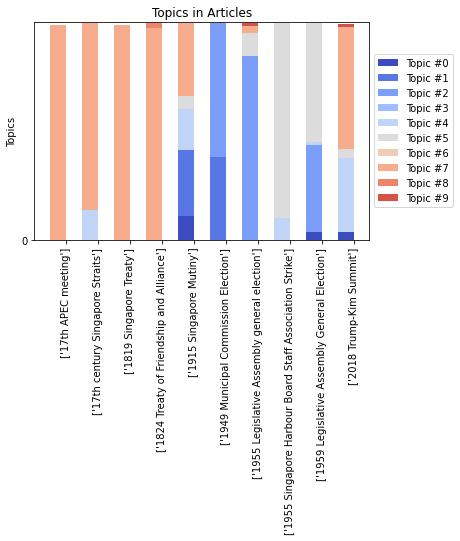

In [ ]:
N = 10
ind = np.arange(N)
K = nlblda.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Articles')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

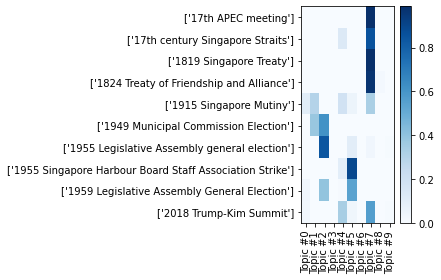

In [ ]:
plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

In [ ]:
nlblda.show_topic(1)

[('university', 0.014858099),
 ('plan', 0.011708683),
 ('lim', 0.011450873),
 ('japanese', 0.01086788),
 ('build', 0.010257534),
 ('art', 0.009614145),
 ('ed', 0.008572004),
 ('school', 0.008027881),
 ('road', 0.008020682),
 ('work', 0.007739149)]

<Figure size 432x288 with 0 Axes>

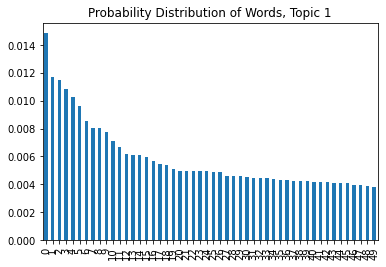

In [ ]:
topic1_df = pandas.DataFrame(nlblda.show_topic(1, topn=50))
plt.figure()
topic1_df.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1')
plt.show()

In [ ]:
senlda1 = gensim.models.ldamodel.LdaModel(corpus=nlbcorpus, id2word=dictionary, num_topics=10, eta = 0.00001)
senlda2 = gensim.models.ldamodel.LdaModel(corpus=nlbcorpus, id2word=dictionary, num_topics=10, eta = 0.9)

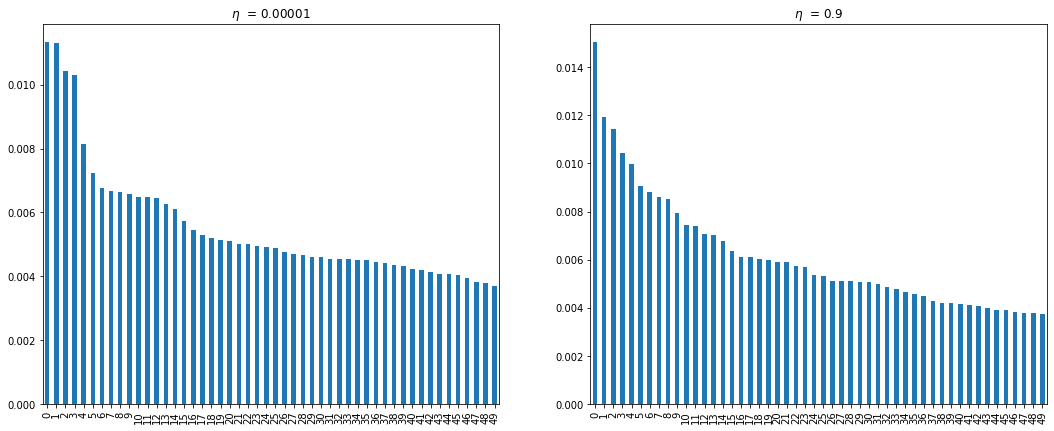

In [ ]:
topic11_df = pandas.DataFrame(senlda1.show_topic(1, topn=50))
topic21_df = pandas.DataFrame(senlda2.show_topic(1, topn=50))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
topic11_df.plot.bar(legend = False, ax = ax1, title = '$\eta$  = 0.00001')
topic21_df.plot.bar(legend = False, ax = ax2, title = '$\eta$  = 0.9')
plt.show()

In [ ]:
senlda1 = gensim.models.ldamodel.LdaModel(corpus=nlbcorpus, id2word=dictionary, num_topics=10, eta = 0.01)
senlda2 = gensim.models.ldamodel.LdaModel(corpus=nlbcorpus, id2word=dictionary, num_topics=10, eta = 0.5)

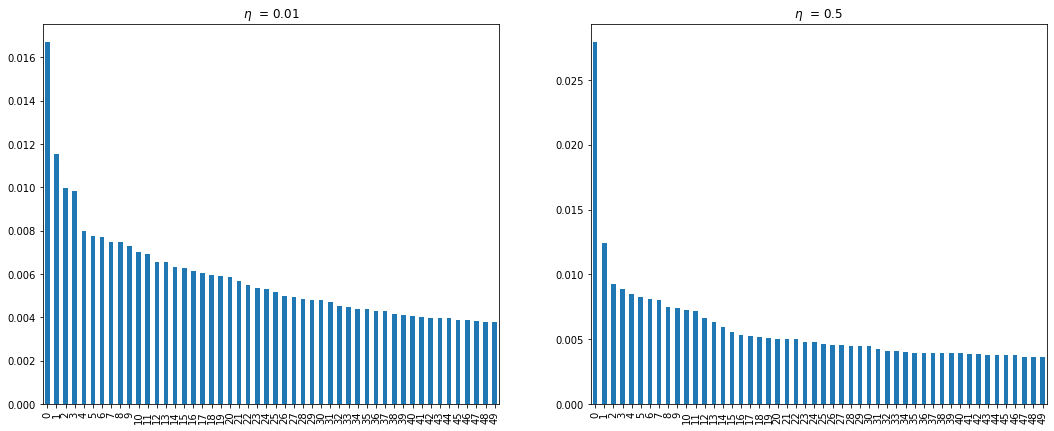

In [ ]:
topic11_df = pandas.DataFrame(senlda1.show_topic(1, topn=50))
topic21_df = pandas.DataFrame(senlda2.show_topic(1, topn=50))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
topic11_df.plot.bar(legend = False, ax = ax1, title = '$\eta$  = 0.01')
topic21_df.plot.bar(legend = False, ax = ax2, title = '$\eta$  = 0.5')
plt.show()

In [ ]:
senlda1 = gensim.models.ldamodel.LdaModel(corpus=nlbcorpus, id2word=dictionary, num_topics=10, alpha = 0.0001)
senlda2 = gensim.models.ldamodel.LdaModel(corpus=nlbcorpus, id2word=dictionary, num_topics=10, alpha = 0.9)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 120572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 120572 missing from current font.
  font.set_text(s, 0, flags=flags)


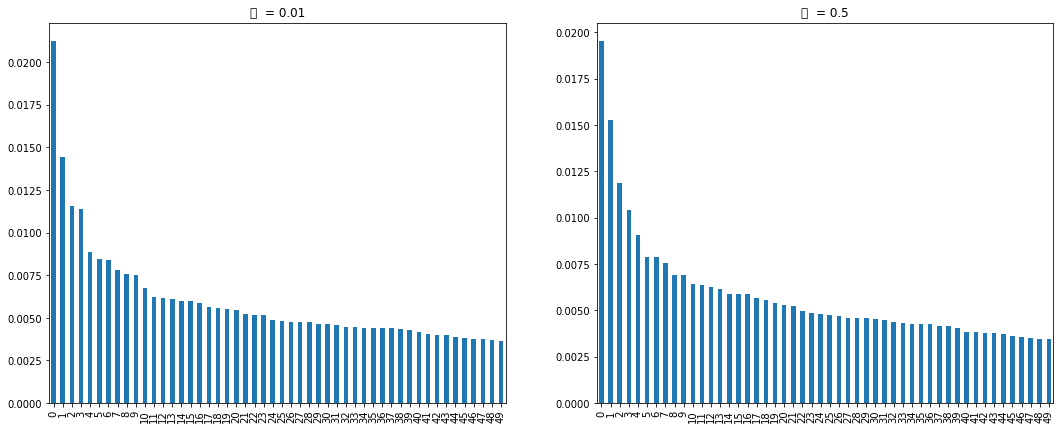

In [ ]:
topic11_df = pandas.DataFrame(senlda1.show_topic(1, topn=50))
topic21_df = pandas.DataFrame(senlda2.show_topic(1, topn=50))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
topic11_df.plot.bar(legend = False, ax = ax1, title = 'alpha  = 0.01')
topic21_df.plot.bar(legend = False, ax = ax2, title = 'alpha  = 0.5')
plt.show()

In [ ]:
senlda1 = gensim.models.ldamodel.LdaModel(corpus=nlbcorpus, id2word=dictionary, num_topics=5, alpha = 0.0001)
senlda2 = gensim.models.ldamodel.LdaModel(corpus=nlbcorpus, id2word=dictionary, num_topics=5, alpha = 0.9)

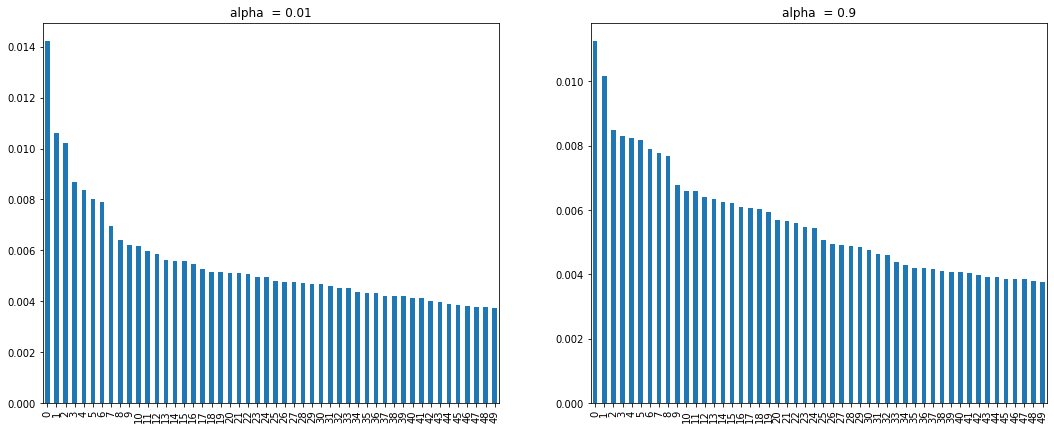

In [ ]:
topic11_df = pandas.DataFrame(senlda1.show_topic(1, topn=50))
topic21_df = pandas.DataFrame(senlda2.show_topic(1, topn=50))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
topic11_df.plot.bar(legend = False, ax = ax1, title = 'alpha  = 0.01')
topic21_df.plot.bar(legend = False, ax = ax2, title = 'alpha  = 0.9')
plt.show()

## <font color="red">*Exercise 4*</font>

<font color="red">Construct cells immediately below this that use dynamic topic models on datasets relevant to your final project. You can also extend the analysis of the COHA or Soap datasets, if relevant to the comparison of data for your projects. (You could possibly use coha_genres dictionary to conduct analysis on topic evolution for a particular genre? What themes do you see evolving throughout these corpora?)

For my analysis of 9 years of sg news topics, before normalizing, the topics seem to be generally static over time, focusing on economic issues.

In [ ]:
sg_news = pandas.read_csv("/content/drive/My Drive/Colab Notebooks/data/sg_news.csv")

In [ ]:
sg_news[:5]

,Unnamed: 0,years,text
0,0,10-01-sg.txt,"["" 1335243 Today , in the final instalment ..."
1,1,10-02-sg.txt,"["" 1369056 These and other revelations are ..."
2,2,10-03-sg.txt,[' 1402395 Get ready to put on your 3D glas...
3,3,10-04-sg.txt,[' 1437350 <h> SPF should build strong commun...
4,4,10-05-sg.txt,[' 1471191 Just when you thought that mobil...


In [ ]:
def no_list(i): 
  string = ''
  for word in i: 
    string += word 
  return string

In [ ]:
sg_news['no_list'] = sg_news['text'].apply(lambda x: no_list(x))

KeyboardInterrupt: ignored

In [ ]:
sg_news['no_list'][:5]

0    ["  1335243   Today , in the final instalment ...
1    ["  1369056   These and other revelations are ...
2    ['  1402395   Get ready to put on your 3D glas...
3    ['  1437350 <h> SPF should build strong commun...
4    ['  1471191   Just when you thought that mobil...
Name: no_list, dtype: object

In [ ]:
sg_years = {}
for y in range(10, 20): 
  for year, text in zip(sg_news['years'], sg_news['text']):
    if year[:2] == str(y):
      if year[:2] not in sg_years: 
        sg_years[year[:2]] = []
      sg_years[year[:2]].append(text)




In [ ]:
def no_list(i): 
  for doc in i: 
    string = ''
    for words in doc:
      string += words 
    return string

In [ ]:
sg_news_years = pandas.DataFrame(sg_years.items(), columns = ['year', 'texts'])
sg_news_years['text_strings'] = sg_news_years['texts'].apply(lambda x: no_list(x))
# len(sg_news_years['texts'][0])

In [ ]:
sg_news_years['text_strings']
# len(sg_news_years['texts'][0])

12

In [ ]:
news_years = {}

for year, text in zip(sg_news_years['year'], sg_news_years['texts']): 
  if year not in news_years: 
    news_years[year] = []
  news_years[year].append(lucem_illud.normalizeTokens(text[0][:1499999]))

In [ ]:
nlbDF = pandas.DataFrame(news_years.items(), columns = ['Year', 'Text'])
nlbDF.to_csv("/content/drive/My Drive/Colab Notebooks/data/sg_news_W2V.csv")

In [ ]:
import collections

In [ ]:
years = []
year_lens = []

In [ ]:
for year_info in collections.OrderedDict(sorted(news_years.items())):
    years.append(year_info)
    for words in news_years[year_info]:
      year_lens.append(len(words))

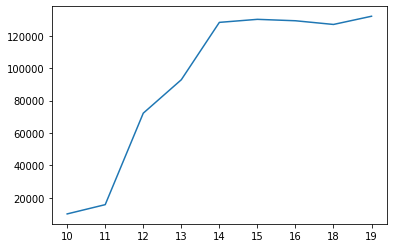

In [ ]:
import matplotlib.pyplot as plt
plt.plot(years, year_lens)

In [ ]:
news_coha = []
docs_per_year = [0, 0, 0, 0, 0, 0, 0, 0, 0]
i = 0

In [ ]:
for year_info in collections.OrderedDict(sorted(news_years.items())):
    large_files = 0
    for article in news_years[year_info]:
        print(len(article))
        try:
            if len(article) < 1500000:
                news_coha.append(article)
            # if len(article[2]) >= 1500000:
            #     large_files += 1
        except IndexError:
            continue
    # these numbers are the number of years in the 
        print(i, year_info)
        if i == 0:
            docs_per_year[0] += len(article)
        if i == 1:
            docs_per_year[1] += len(article) 
        if i == 2: 
            docs_per_year[2] += len(article)
        if i == 3:
            docs_per_year[3] += len(article) 
        if i == 4: 
            docs_per_year[4] += len(article) 
        if i == 5: 
            docs_per_year[5] += len(article) 
        if i == 6: 
            docs_per_year[6] += len(article) 
        if i == 7: 
            docs_per_year[7] += len(article) 
        if i == 8: 
            docs_per_year[8] += len(article) 
    i += 1

10023
0 10
15745
1 11
72227
2 12
92878
3 13
128306
4 14
130180
5 15
129304
6 16
127023
7 18
132092
8 19


In [ ]:
print(docs_per_year)

[10023, 15745, 72227, 92878, 128306, 130180, 129304, 127023, 132092]


In [ ]:
print(news_coha[:10])

[]


In [ ]:
dictionary = gensim.corpora.Dictionary(news_coha)

In [ ]:
corpus = [dictionary.doc2bow(text) for text in news_coha]

In [ ]:
gensim.corpora.MmCorpus.serialize('news.mm', corpus)
newscorpus = gensim.corpora.MmCorpus('news.mm')

In [ ]:
from gensim.models import ldaseqmodel

In [ ]:
ldaseq = ldaseqmodel.LdaSeqModel(corpus=corpus, id2word=dictionary, time_slice= docs_per_year, num_topics = 8)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldaseqmodel.py:290: RuntimeWarning: divide by zero encountered in double_scalars
  convergence = np.fabs((bound - old_bound) / old_bound)


In [ ]:
ldaseq.save("/content/drive/My Drive/Colab Notebooks/data/ldaseqmodel")

In [ ]:
ldaseq.print_topics(time=8)

[[('$', 0.01429753946999627),
  ('year', 0.010498749081895593),
  ('rate', 0.009414847918917663),
  ('stock', 0.009382437562021393),
  ('say', 0.009341531208020011),
  ('<', 0.007769159499914724),
  ('price', 0.007062921505069898),
  ('>', 0.006625584589849171),
  ('h', 0.0058319958803569145),
  ('cent', 0.005672405211746742),
  ('quarter', 0.00470816841733514),
  ('company', 0.0043482944792333205),
  ('attack', 0.003829052767406064),
  ('average', 0.003789155895128173),
  ('november', 0.0037031543696392734),
  ('buy', 0.003666909387358603),
  ('share', 0.003565769570184958),
  ('analyst', 0.003558355222282376),
  ('investor', 0.0034630540822166225),
  ('trade', 0.003459117641747727)],
 [('year', 0.005418310616719608),
  ('\\r\\n', 0.005290987595973923),
  ('new', 0.005210324202700494),
  ('<', 0.00483454460280427),
  ('>', 0.004757436319370649),
  ('say', 0.004674627556194818),
  ('h', 0.004635600698793556),
  ('time', 0.003912142290635223),
  ('game', 0.003350175718882532),
  ('devic

In [ ]:
ldaseq.print_topics()

[[('$', 0.014282176950481307),
  ('year', 0.01049274303187599),
  ('rate', 0.009407087300447536),
  ('stock', 0.009381188654244373),
  ('say', 0.00933710868999428),
  ('<', 0.007766963206505154),
  ('price', 0.007061217359896497),
  ('>', 0.006620036483567552),
  ('h', 0.0058272196408890135),
  ('cent', 0.005669340938587487),
  ('quarter', 0.004706374871232945),
  ('company', 0.004346823278543623),
  ('attack', 0.0038267669120562223),
  ('average', 0.0037871730642405257),
  ('november', 0.0037005896406409004),
  ('buy', 0.0036653670873099424),
  ('share', 0.0035647470587237473),
  ('analyst', 0.0035580513585411902),
  ('investor', 0.003460798880177365),
  ('trade', 0.00345767702337708)],
 [('year', 0.0054122951976571885),
  ('\\r\\n', 0.00528502560328306),
  ('new', 0.005202448835300712),
  ('<', 0.004827640776614543),
  ('>', 0.004748551191129448),
  ('say', 0.004668364437438426),
  ('h', 0.00462873108358018),
  ('time', 0.003907583472282957),
  ('game', 0.0033461565077386904),
  ('de